In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import nibabel as nib
from tqdm import tqdm
from pathlib import Path
import sys
import os
import shutil
from sklearn.utils import shuffle

In [2]:
tick_size = 20
matplotlib.rcParams.update({
    'figure.figsize':(20,10), 
    'font.size': 25, 
    "axes.labelsize":25, 
    "xtick.labelsize": tick_size, 
    "ytick.labelsize": tick_size,
    'font.family':'serif'
})

sns.set(rc={
    'figure.figsize':(20,10), 
    'font.size': 25, 
    "axes.labelsize":25, 
    "xtick.labelsize": tick_size, 
    "ytick.labelsize": tick_size,
    'font.family':'serif',
    'grid.linestyle': '',
    'axes.facecolor': 'white',
    'axes.edgecolor': '0.2',
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
})

palette = sns.color_palette("Set2", n_colors=6, desat=1)

In [5]:
MODEL_NAME = "phinet_multitask_1"
RESULTS_DIR = Path("/nfs/share5/remedis/projects/clinical_outcome_prediction/results/") / MODEL_NAME
results_path = sorted(list(RESULTS_DIR.iterdir()))

In [7]:
results_path = results_path[0]

In [8]:
results_path

PosixPath('/nfs/share5/remedis/projects/clinical_outcome_prediction/results/phinet_multitask_1/testing_todo_currently_val.csv')

In [9]:
df = pd.read_csv(results_path)

In [10]:
df

,gcs_true,gcs_pred,los_true,los_pred,marshall_true,marshall_pred,death_true,death_pred,discharge_true,discharge_pred
0,14.0,10.5489,1.0,5.8013,1.0,2.187,0.0,0.0,0.0,0.0
1,14.0,10.5489,1.0,5.8013,1.0,2.187,0.0,0.0,0.0,0.0
2,14.0,10.5489,1.0,5.8013,1.0,2.187,0.0,0.0,0.0,0.0
3,14.0,10.5489,1.0,5.8013,1.0,2.187,0.0,0.0,0.0,0.0
4,14.0,10.5489,1.0,5.8013,1.0,2.187,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20856,15.0,10.5489,1.0,5.8013,2.0,2.187,0.0,0.0,0.0,0.0
20857,15.0,10.5489,1.0,5.8013,2.0,2.187,0.0,0.0,0.0,0.0
20858,15.0,10.5489,1.0,5.8013,2.0,2.187,0.0,0.0,0.0,0.0
20859,15.0,10.5489,1.0,5.8013,2.0,2.187,0.0,0.0,0.0,0.0


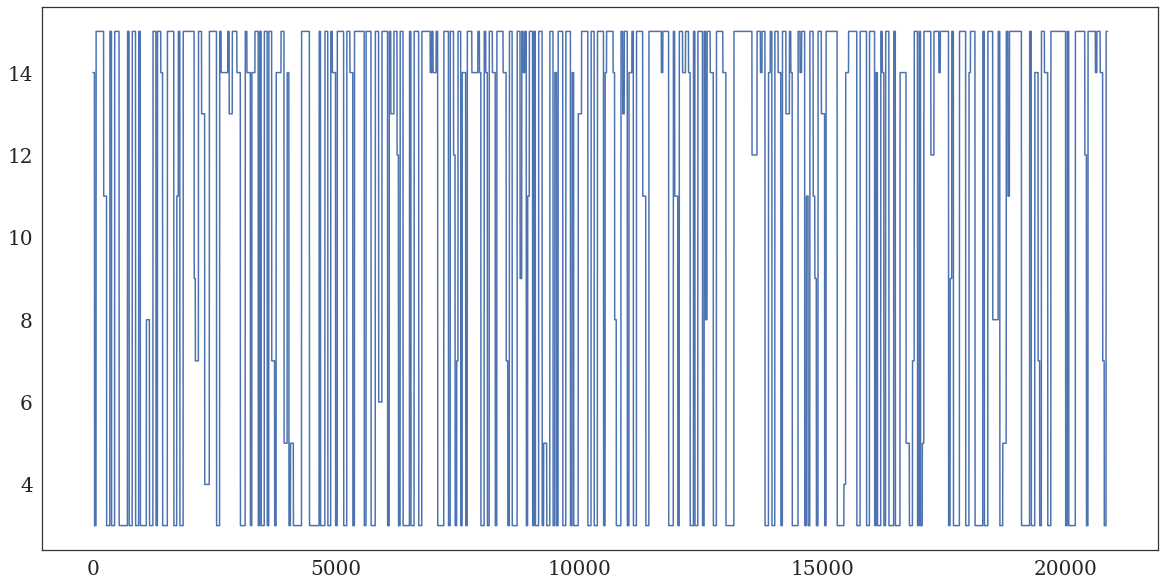

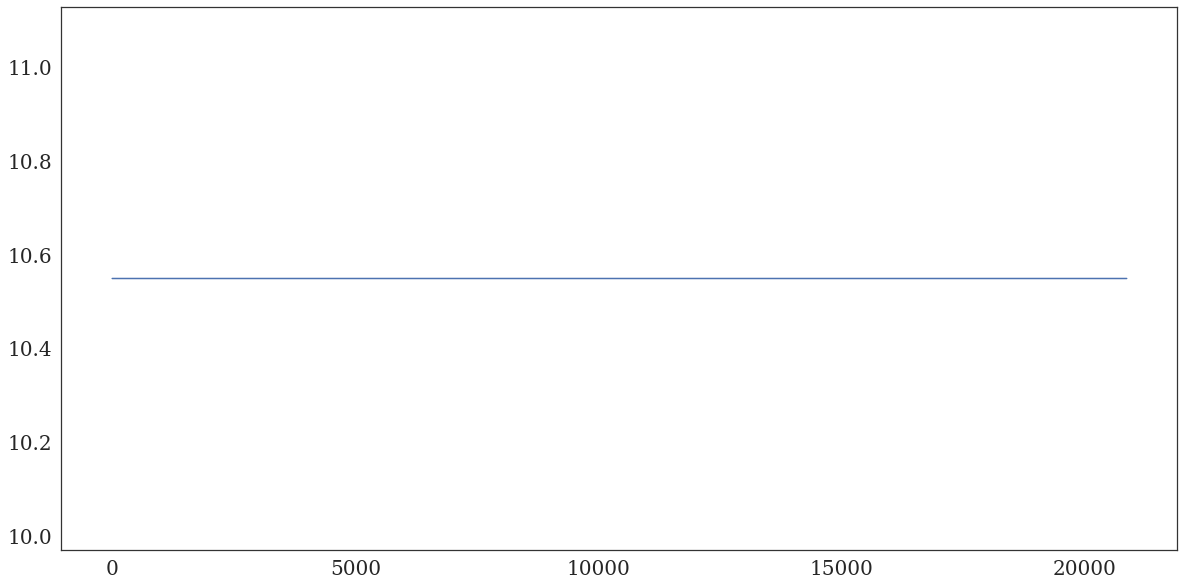

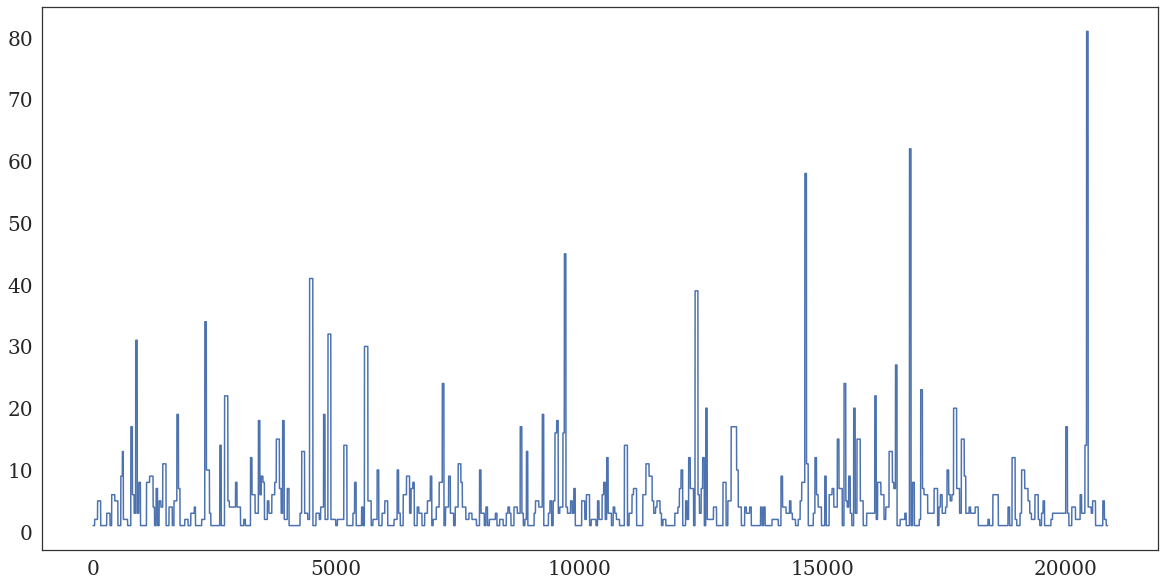

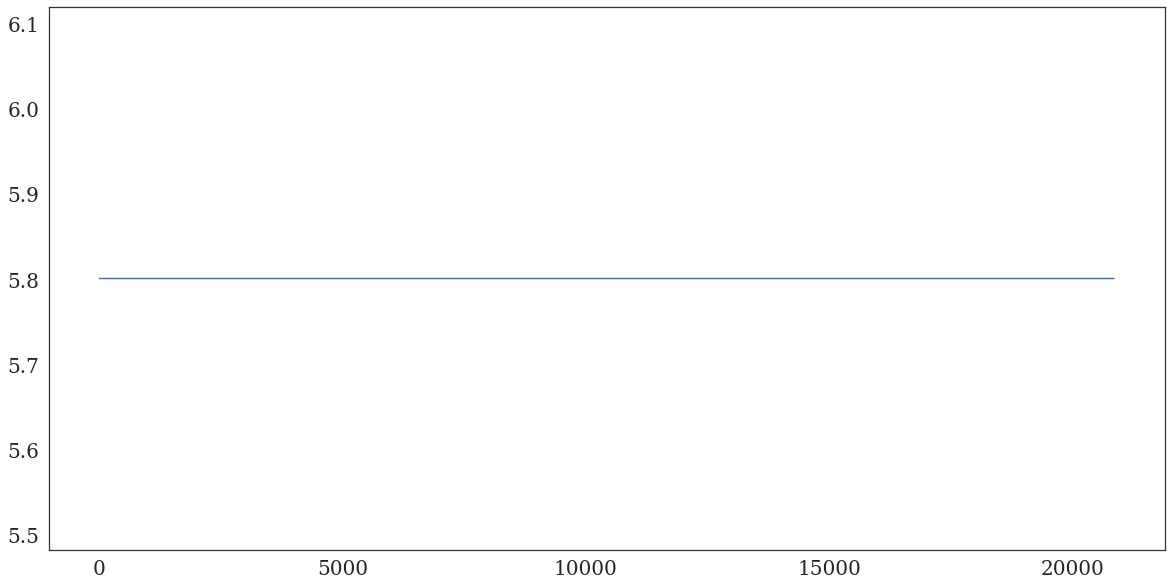

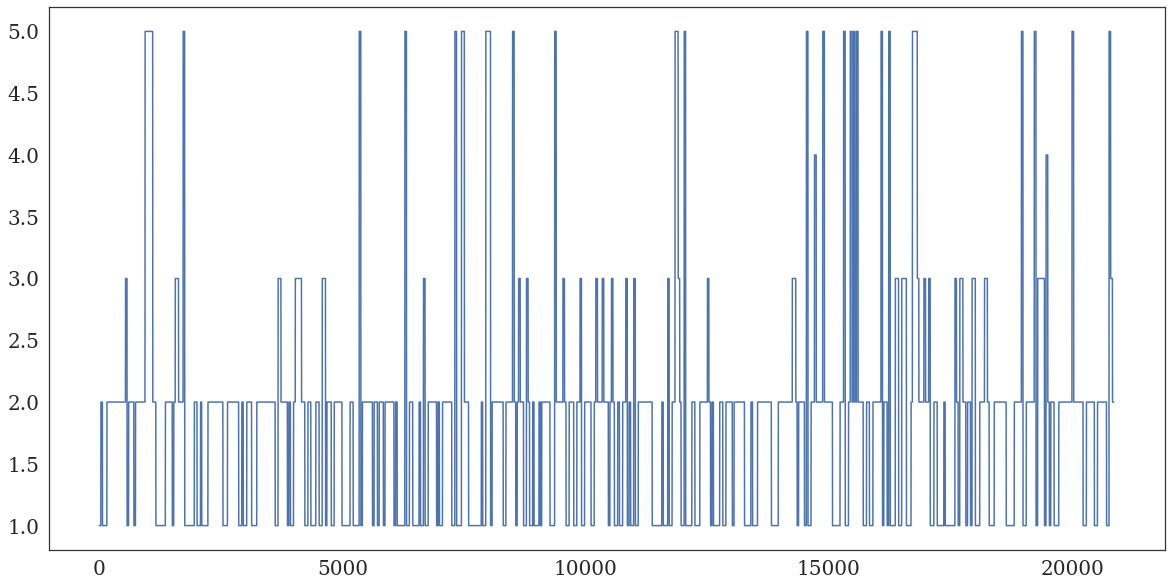

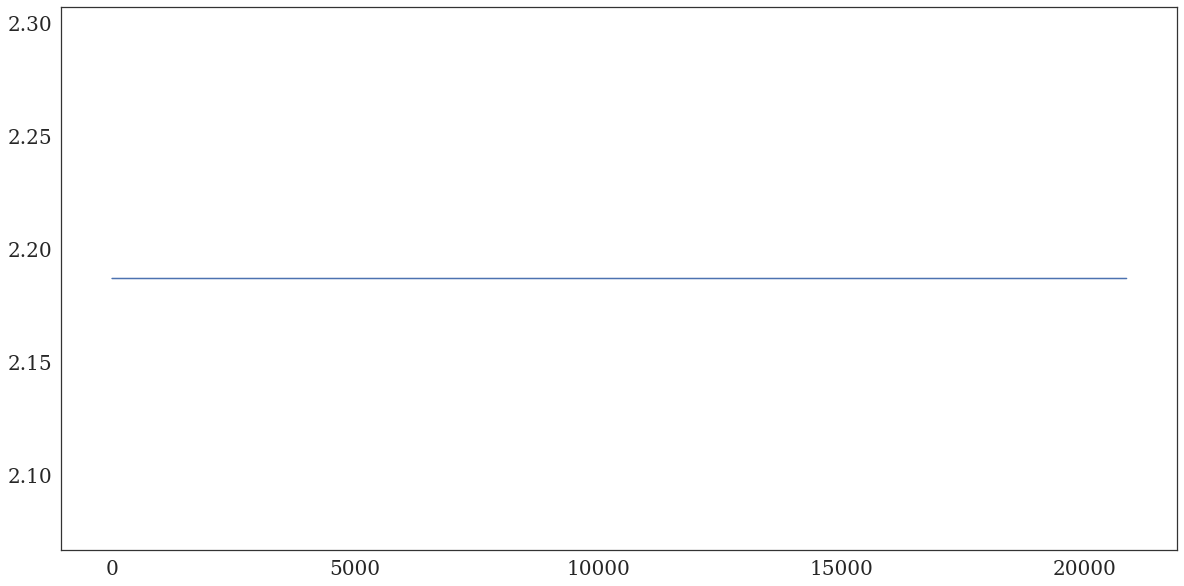

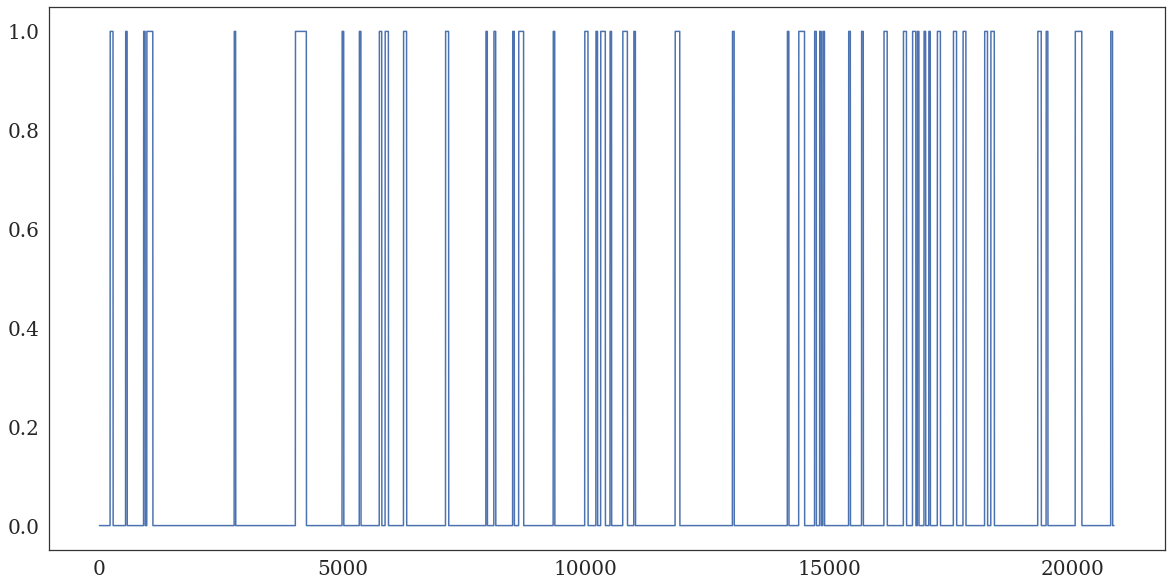

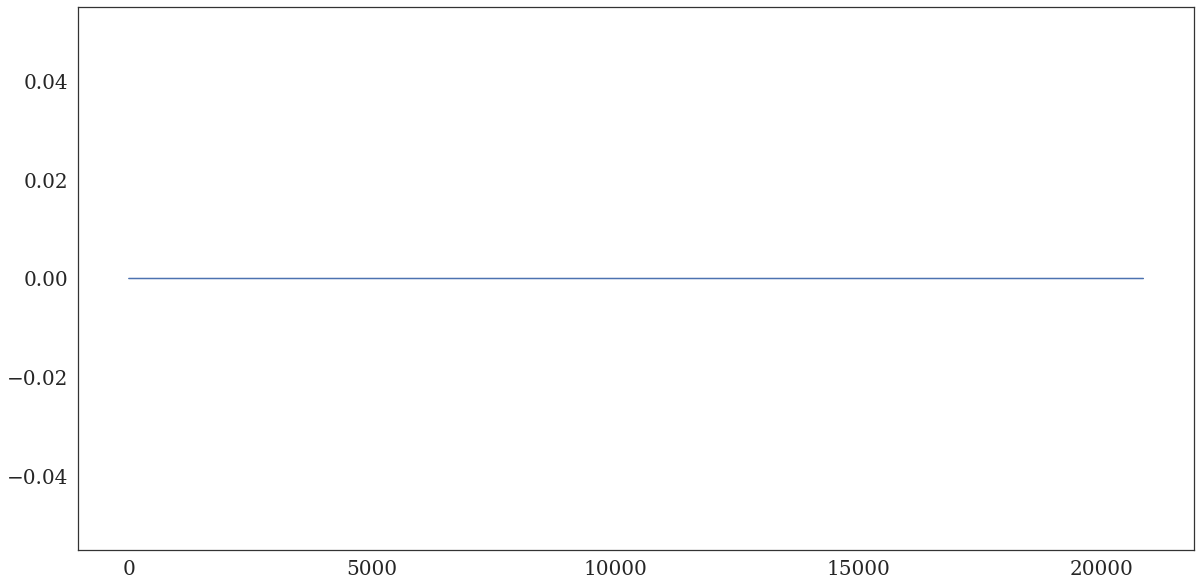

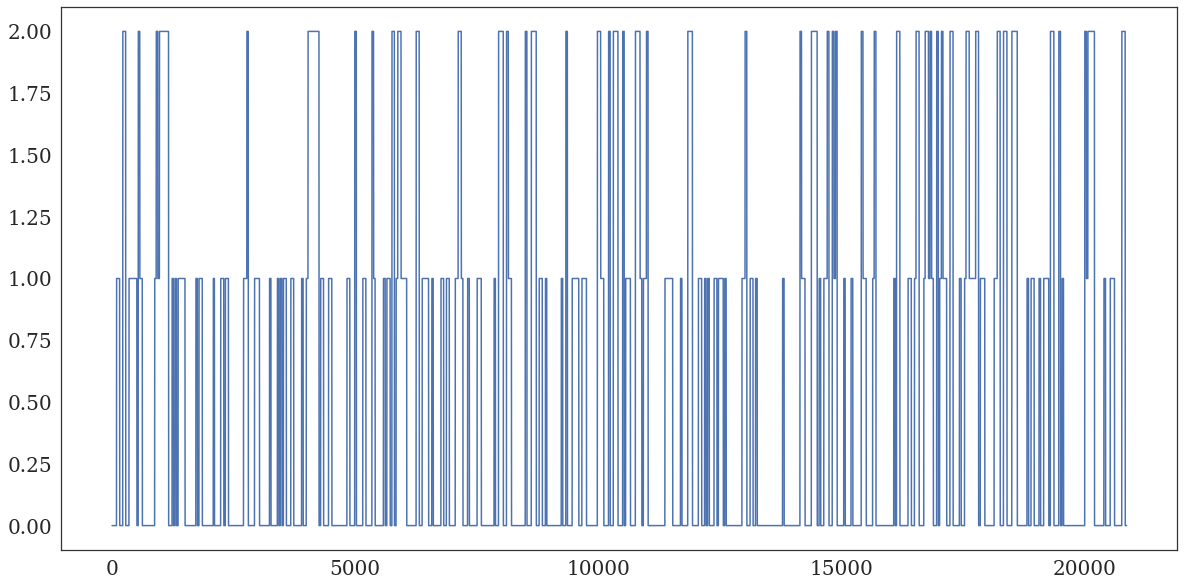

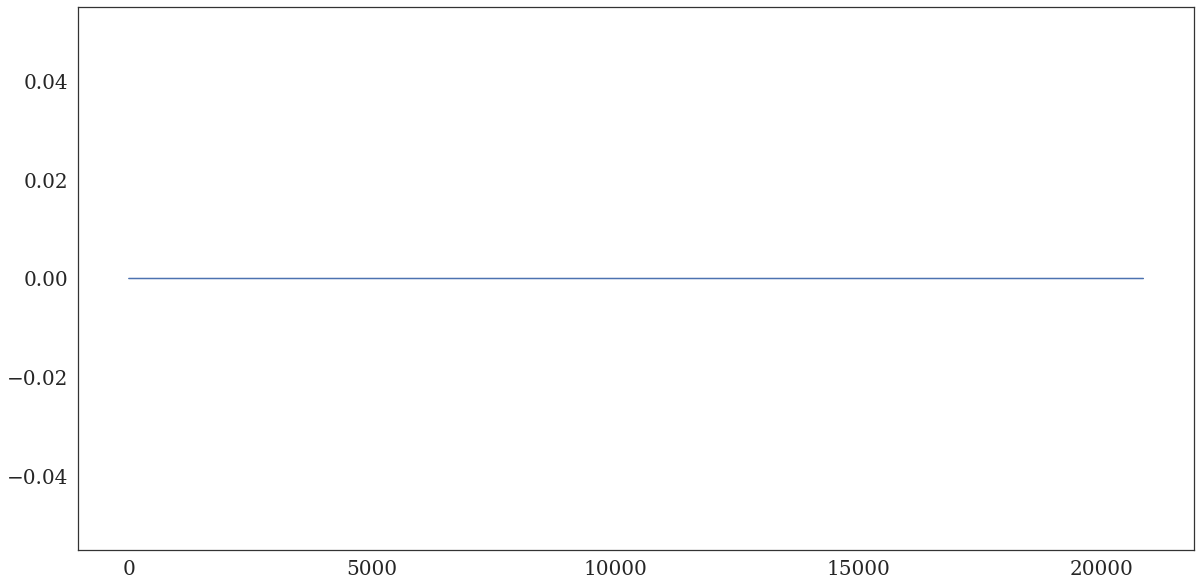

In [16]:
for col in df.columns:
    plt.plot(df[col])
    plt.show()

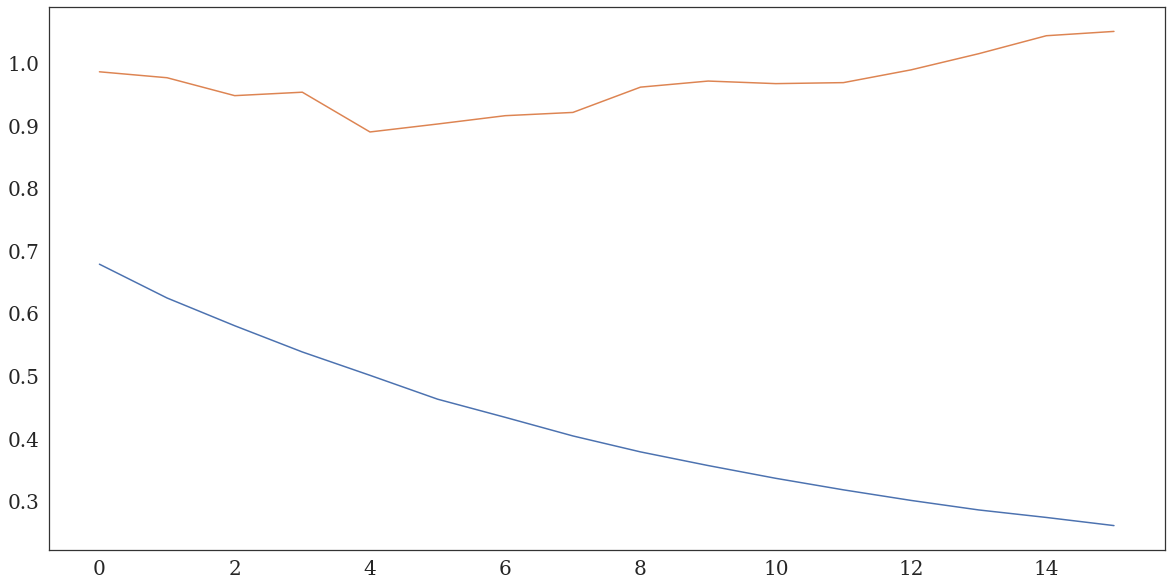

In [13]:
plt.plot(train_losses[0])
plt.plot(val_losses[0])
plt.show()

In [14]:
def plot_ci(train_metrics, val_metrics, palette, metric_name=None):
    for i, (metrics, dataset_type) in enumerate(zip((train_metrics, val_metrics), ("Train", "Validation"))):
        upper_bound = min([len(m) for m in metrics])
        trimmed_metrics = [x[:upper_bound] for x in metrics]
        
        mean_metrics = np.mean(trimmed_metrics, axis=0)
        std_metrics = np.std(trimmed_metrics, axis=0)
        
        plt.plot(mean_metrics, color=palette[i], label="{} {}".format(dataset_type, metric_name))
        plt.fill_between(range(len(mean_metrics)), 
                         mean_metrics - std_metrics, 
                         mean_metrics + std_metrics, 
                         alpha=0.2,
                         color=palette[i])

    plt.title("Training/Validation {} Curves".format(metric_name))
    plt.legend()
    plt.show()

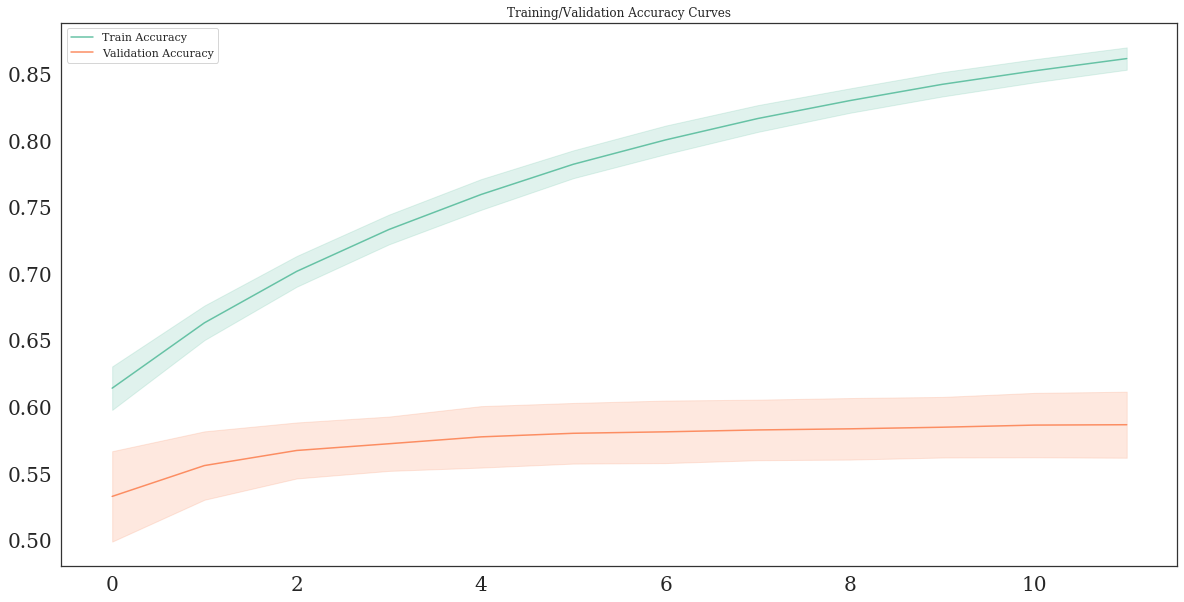

In [15]:
plot_ci(train_accs, val_accs, palette, "Accuracy")

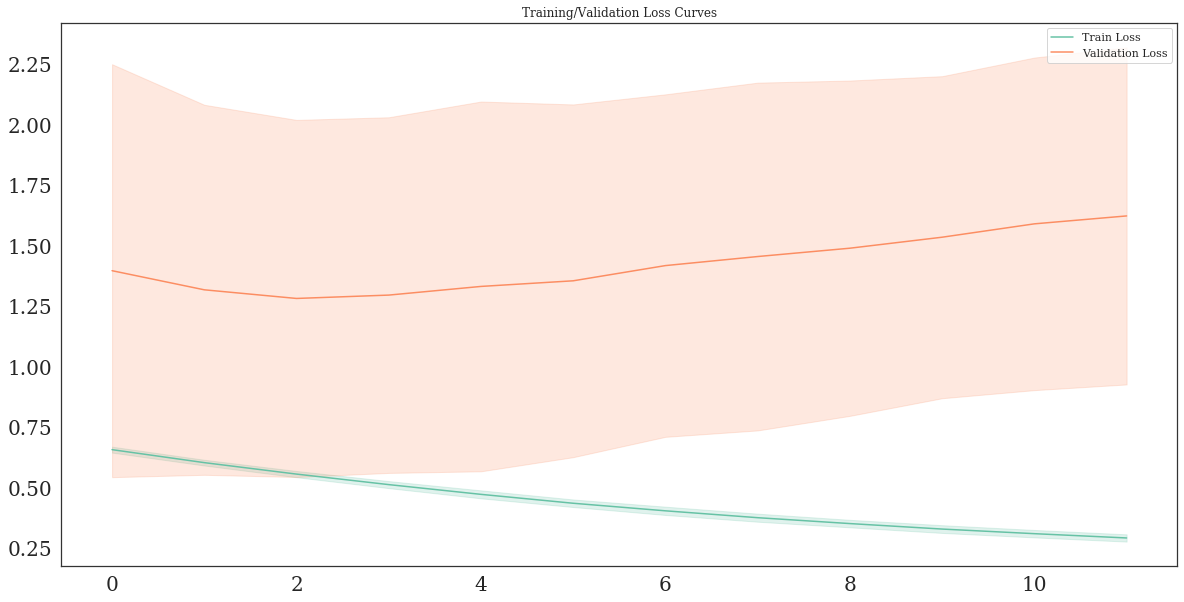

In [16]:
plot_ci(train_losses, val_losses, palette, "Loss")